In [ ]:
import pandas as pd
!pip install lifelines
import lifelines
from lifelines.utils import concordance_index
! pip install rdkit
from rdkit import Chem
import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 9.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=0e986b5631b5cd41e5bc6e96547cb7d2c4299e0db8082a1bff9dda4d173d0bf2
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 28.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
far = pd.read_csv('/content/drive/MyDrive/ChemProj/combined/far.csv')
medium = pd.read_csv('/content/drive/MyDrive/ChemProj/combined/medium.csv')
close = pd.read_csv('/content/drive/MyDrive/ChemProj/combined/close.csv')

In [ ]:
far

,Unnamed: 0,SMILES,PROTEIN,YHAT,GAT_GCN_bdtdc_ic50,GAT_GCN_bdtdc_ki,GAT_GCN_bindingdb_kd,GCNNet_bdtdc_ic50,GCNNet_bdtdc_kd,GCNNet_bdtdc_ki,...,GINConvNet_bdtdc_ki,DEEP_DTA_pIC50,DEEP_DTA_pKd,DEEP_DTA_pKi,MLTLE_GIN_pKi,MLTLE_GIN_pKd,MLTLE_GIN_pIC50,MLTLE_GCN_pKi,MLTLE_GCN_pKd,MLTLE_GCN_pIC50
0,0,CC(C)=CCCC(C)(OC1OC(COC2OC(CO)C(O)C(O)C2O)C(O)...,MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,0,4.849226,7.140687,7.510621,4.387906,7.004057,6.323264,...,6.897599,6.733875,6.442408,5.275156,5.214328,6.460061,4.803761,5.286420,7.711789,5.681494
1,1,CCC(=O)C1CC(C)C2(CC3(C)CCC4=C(CCC5C4(C)CCC(OC4...,MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,0,4.697755,7.928941,6.971755,5.262678,7.192956,6.403645,...,6.682440,6.433234,6.371249,8.120274,5.388729,7.109087,6.938921,4.805015,7.837626,6.568529
2,2,CC1CCC2(OC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,0,4.735731,7.816075,7.037689,5.301126,7.251243,7.066597,...,6.517390,5.235683,8.256589,8.723220,6.359992,6.734917,6.182004,4.698490,7.996673,5.901593
3,3,CC1CCC2(OC1)OC1CC3C4CCC5CC(OC6OC(CO)C(OC7OC(CO...,MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,0,4.735731,7.816075,7.037690,5.301126,7.251243,7.066597,...,6.517474,5.031082,8.258035,7.549199,6.337416,6.730224,6.171910,4.700651,7.996673,5.903866
4,4,COC1(CCC(C)COC2OC(CO)C(O)C(O)C2O)OC2CC3C4CC=C5...,MAKATSGAAGLRLLLLLLLPLLGKVALGLYFSRDAYWEKLYVDQAA...,0,4.518467,7.200572,7.449335,4.993604,7.281079,6.783412,...,6.874987,6.089859,8.273869,8.606338,5.566683,6.944002,6.319051,5.193835,7.687243,6.298519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,CC(=O)NC1C(OC2C(C(=O)O)OC(OC3C(COS(=O)(=O)O)OC...,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,0,4.297640,6.305561,6.886652,5.879141,8.520374,5.669056,...,10.635351,6.030581,4.522482,6.756760,7.398721,7.800602,6.226177,6.925630,7.428631,6.546861
499996,499996,O=C(O)C1=CC(O)C(OS(=O)(=O)O)C(OC2C(COS(=O)(=O)...,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,0,5.846232,6.538202,6.949626,5.627595,8.650036,5.705116,...,11.036837,5.490418,7.692230,5.972975,7.200781,8.277670,5.892046,6.577697,7.548348,5.818839
499997,499997,O=C(O)C1=CC(O)C(OS(=O)(=O)O)C(OC2C(COS(=O)(=O)...,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,0,5.846232,6.538202,6.949626,5.627595,8.650036,5.705116,...,11.044523,5.490418,7.692230,5.972975,7.200781,8.277670,5.892046,6.577697,7.548348,5.818839
499998,499998,O=C(O)C1=CC(O)C(OS(=O)(=O)O)C(OC2C(COS(=O)(=O)...,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,0,5.962442,6.453899,6.919115,5.739860,8.550553,5.691675,...,11.219160,5.490418,7.692230,5.972975,7.200781,8.277670,5.892046,6.577697,7.548348,5.818839


In [ ]:
columns = far.columns.tolist()[4:]

pKi_list = [name for name in columns if name.endswith('_pKi') or name.endswith('_ki')]
pKd_list = [name for name in columns if name.endswith('_pKd') or name.endswith('_kd')]
pIC50_list = [name for name in columns if name.endswith('_pIC50') or name.endswith('_ic50')]

# now we have 3 lists for each binding constant predictions

In [ ]:
pKi_list

['GAT_GCN_bdtdc_ki',
 'GCNNet_bdtdc_ki',
 'GINConvNet_bdtdc_ki',
 'DEEP_DTA_pKi',
 'MLTLE_GIN_pKi',
 'MLTLE_GCN_pKi']

In [ ]:
pKd_list

['GAT_GCN_bindingdb_kd',
 'GCNNet_bdtdc_kd',
 'GINConvNet_bdtdc_kd',
 'DEEP_DTA_pKd',
 'MLTLE_GIN_pKd',
 'MLTLE_GCN_pKd']

In [ ]:
pIC50_list

['GAT_GCN_bdtdc_ic50',
 'GCNNet_bdtdc_ic50',
 'GINConvNet_bdtdc_ic50',
 'DEEP_DTA_pIC50',
 'MLTLE_GIN_pIC50',
 'MLTLE_GCN_pIC50']

In [ ]:
subset_5vs1 = ['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi']
subset_2vs1 = ['GCNNet_bdtdc_ki', 'MLTLE_GCN_pKi']
subset_3vs1 = ['GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi']

ci_5vs1 = concordance_index(far[subset_5vs1].mean(axis=1), far['MLTLE_GCN_pKi'])
ci_2vs1 = concordance_index(far[subset_2vs1].mean(axis=1), far['MLTLE_GCN_pKi'])
ci_3vs1 = concordance_index(far[subset_3vs1].mean(axis=1), far['MLTLE_GCN_pKi'])

print(f"Concordance Index for 5 vs 1: {ci_5vs1}")
print(f"Concordance Index for 2 vs 1: {ci_2vs1}")
print(f"Concordance Index for 3 vs 1: {ci_3vs1}")

Concordance Index for 5 vs 1: 0.6605430017643869
Concordance Index for 2 vs 1: 0.7758957775759766
Concordance Index for 3 vs 1: 0.6378868674643432


In [ ]:
far_pKi = []
for exclude in pKi_list:
    average_subset = [col for col in pKi_list if col != exclude]
    ci = concordance_index(far[average_subset].mean(axis=1), far[exclude])
    far_pKi.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GAT_GCN_bdtdc_ki, CI: 0.7015596396468162
['GAT_GCN_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GCNNet_bdtdc_ki, CI: 0.687887515718112
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GINConvNet_bdtdc_ki, CI: 0.6063335564796895
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs DEEP_DTA_pKi, CI: 0.645736766638979
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GCN_pKi'] vs MLTLE_GIN_pKi, CI: 0.664704114991759
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi'] vs MLTLE_GCN_pKi, CI: 0.6605430017643869


In [ ]:
medium_pKi = []
for exclude in pKi_list:
    average_subset = [col for col in pKi_list if col != exclude]
    ci = concordance_index(medium[average_subset].mean(axis=1), medium[exclude])
    medium_pKi.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GAT_GCN_bdtdc_ki, CI: 0.7487759473998286
['GAT_GCN_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GCNNet_bdtdc_ki, CI: 0.7441824248025188
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GINConvNet_bdtdc_ki, CI: 0.7044812811540796
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs DEEP_DTA_pKi, CI: 0.7184432499743745
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GCN_pKi'] vs MLTLE_GIN_pKi, CI: 0.7409647104733259
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi'] vs MLTLE_GCN_pKi, CI: 0.7530484749393153


In [ ]:
close_pKi = []
for exclude in pKi_list:
    average_subset = [col for col in pKi_list if col != exclude]
    ci = concordance_index(close[average_subset].mean(axis=1), close[exclude])
    close_pKi.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GAT_GCN_bdtdc_ki, CI: 0.715510682973366
['GAT_GCN_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GCNNet_bdtdc_ki, CI: 0.711481778951558
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GINConvNet_bdtdc_ki, CI: 0.7036973800587601
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs DEEP_DTA_pKi, CI: 0.671929656515313
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GCN_pKi'] vs MLTLE_GIN_pKi, CI: 0.7484026152492305
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi'] vs MLTLE_GCN_pKi, CI: 0.7420794881989764


In [ ]:
davis = pd.read_csv('/content/drive/MyDrive/ChemProj/DTA-models/Results_Davis/all_models_davis.csv')

In [ ]:
davis_pKi = []
for exclude in pKi_list:
    average_subset = [col for col in pKi_list if col != exclude]
    ci = concordance_index(davis[average_subset].mean(axis=1), davis[exclude])
    davis_pKi.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GAT_GCN_bdtdc_ki, CI: 0.71509091936184
['GAT_GCN_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GCNNet_bdtdc_ki, CI: 0.7292420215138163
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs GINConvNet_bdtdc_ki, CI: 0.6965771149603677
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'MLTLE_GIN_pKi', 'MLTLE_GCN_pKi'] vs DEEP_DTA_pKi, CI: 0.6898306782976851
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GCN_pKi'] vs MLTLE_GIN_pKi, CI: 0.7454302168625981
['GAT_GCN_bdtdc_ki', 'GCNNet_bdtdc_ki', 'GINConvNet_bdtdc_ki', 'DEEP_DTA_pKi', 'MLTLE_GIN_pKi'] vs MLTLE_GCN_pKi, CI: 0.7610875834715854


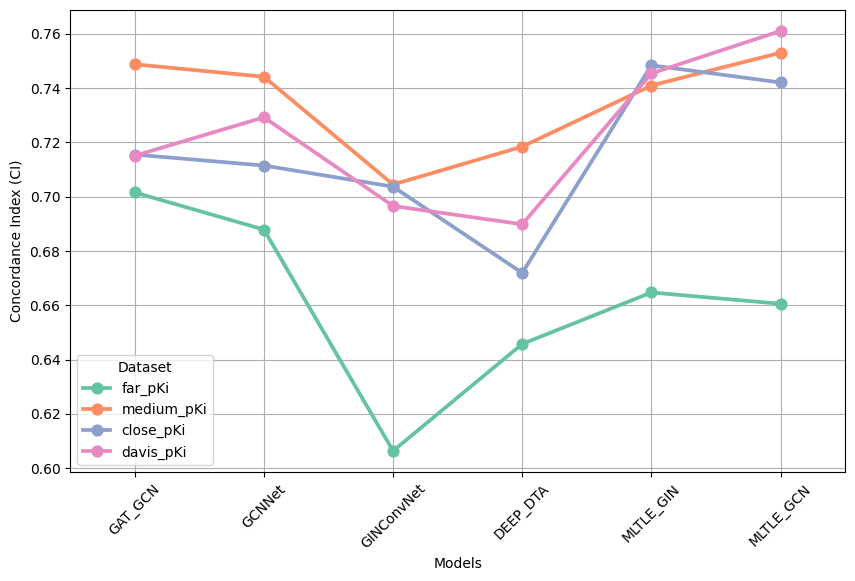

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Models': ['GAT_GCN', 'GCNNet', 'GINConvNet', 'DEEP_DTA', 'MLTLE_GIN', 'MLTLE_GCN'],
    'far_pKi': far_pKi,
    'medium_pKi': medium_pKi,
    'close_pKi': close_pKi,
    'davis_pKi': davis_pKi,
}

# Create a dataframe
df = pd.DataFrame(data)

# Melt the dataframe to long format for seaborn plotting
df_melted = df.melt(id_vars='Models', var_name='Dataset', value_name='CI')

# Create a grouped point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Models', y='CI', hue='Dataset', data=df_melted, palette='Set2')
plt.title('')
plt.xlabel('Models')
plt.ylabel('Concordance Index (CI)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Dataset')
plt.show()

In [ ]:
import pandas as pd

# Define the data
data = {
    'Models': ['GAT_GCN', 'GCNNet', 'GINConvNet', 'DEEP_DTA', 'MLTLE_GIN', 'MLTLE_GCN'],
    'far_pKi': far_pKi,
    'medium_pKi': medium_pKi,
    'close_pKi': close_pKi,
    'davis_pKi': davis_pKi,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Models column as the index
df.set_index('Models', inplace=True)

# Display the DataFrame
print(df)

             far_pKi  medium_pKi  close_pKi  davis_pKi
Models                                                
GAT_GCN     0.701560    0.748776   0.715511   0.715091
GCNNet      0.687888    0.744182   0.711482   0.729242
GINConvNet  0.606334    0.704481   0.703697   0.696577
DEEP_DTA    0.645737    0.718443   0.671930   0.689831
MLTLE_GIN   0.664704    0.740965   0.748403   0.745430
MLTLE_GCN   0.660543    0.753048   0.742079   0.761088


Now pKd


In [ ]:
far_pKd = []
for exclude in pKd_list:
    average_subset = [col for col in pKd_list if col != exclude]
    ci = concordance_index(far[average_subset].mean(axis=1), far[exclude])
    far_pKd.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GAT_GCN_bindingdb_kd, CI: 0.6977037492552229
['GAT_GCN_bindingdb_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GCNNet_bdtdc_kd, CI: 0.7182332462016969
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GINConvNet_bdtdc_kd, CI: 0.6407696284774177
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs DEEP_DTA_pKd, CI: 0.6745973072948576
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GCN_pKd'] vs MLTLE_GIN_pKd, CI: 0.7029556538324151
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd'] vs MLTLE_GCN_pKd, CI: 0.7022828732196387


In [ ]:
medium_pKd = []
for exclude in pKd_list:
    average_subset = [col for col in pKd_list if col != exclude]
    ci = concordance_index(medium[average_subset].mean(axis=1), medium[exclude])
    medium_pKd.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GAT_GCN_bindingdb_kd, CI: 0.7117018269307517
['GAT_GCN_bindingdb_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GCNNet_bdtdc_kd, CI: 0.7535513918951815
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GINConvNet_bdtdc_kd, CI: 0.7089083481564504
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs DEEP_DTA_pKd, CI: 0.6969946555245257
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GCN_pKd'] vs MLTLE_GIN_pKd, CI: 0.7502354768909764
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd'] vs MLTLE_GCN_pKd, CI: 0.7367731622210547


In [ ]:
close_pKd = []
for exclude in pKd_list:
    average_subset = [col for col in pKd_list if col != exclude]
    ci = concordance_index(close[average_subset].mean(axis=1), close[exclude])
    close_pKd.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GAT_GCN_bindingdb_kd, CI: 0.7121868584017168
['GAT_GCN_bindingdb_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GCNNet_bdtdc_kd, CI: 0.753629467470935
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GINConvNet_bdtdc_kd, CI: 0.7257032206344413
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs DEEP_DTA_pKd, CI: 0.6688722592885186
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GCN_pKd'] vs MLTLE_GIN_pKd, CI: 0.7576029548059096
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd'] vs MLTLE_GCN_pKd, CI: 0.7429136099032198


In [ ]:
davis_pKd = []
for exclude in pKd_list:
    average_subset = [col for col in pKd_list if col != exclude]
    ci = concordance_index(davis[average_subset].mean(axis=1), davis[exclude])
    davis_pKd.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GAT_GCN_bindingdb_kd, CI: 0.7670363201741085
['GAT_GCN_bindingdb_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GCNNet_bdtdc_kd, CI: 0.781730084259474
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs GINConvNet_bdtdc_kd, CI: 0.7701667350494438
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'MLTLE_GIN_pKd', 'MLTLE_GCN_pKd'] vs DEEP_DTA_pKd, CI: 0.6444780610212224
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GCN_pKd'] vs MLTLE_GIN_pKd, CI: 0.759684814861064
['GAT_GCN_bindingdb_kd', 'GCNNet_bdtdc_kd', 'GINConvNet_bdtdc_kd', 'DEEP_DTA_pKd', 'MLTLE_GIN_pKd'] vs MLTLE_GCN_pKd, CI: 0.7304214162965077


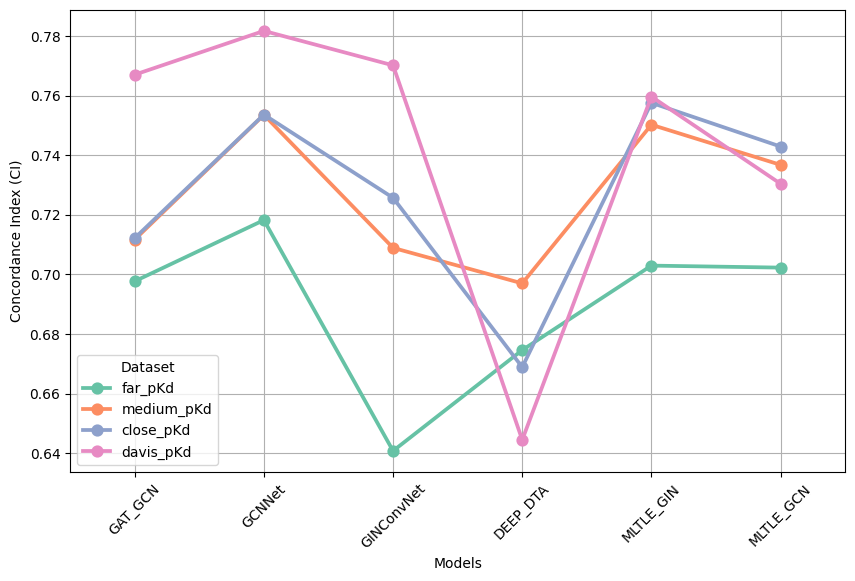

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Models': ['GAT_GCN', 'GCNNet', 'GINConvNet', 'DEEP_DTA', 'MLTLE_GIN', 'MLTLE_GCN'],
    'far_pKd': far_pKd,
    'medium_pKd': medium_pKd,
    'close_pKd': close_pKd,
    'davis_pKd': davis_pKd,
}

# Create a dataframe
df = pd.DataFrame(data)

# Melt the dataframe to long format for seaborn plotting
df_melted = df.melt(id_vars='Models', var_name='Dataset', value_name='CI')

# Create a grouped point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Models', y='CI', hue='Dataset', data=df_melted, palette='Set2')
plt.title('')
plt.xlabel('Models')
plt.ylabel('Concordance Index (CI)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Dataset')
plt.show()

In [ ]:
import pandas as pd

# Define the data
data = {
    'Models': ['GAT_GCN', 'GCNNet', 'GINConvNet', 'DEEP_DTA', 'MLTLE_GIN', 'MLTLE_GCN'],
    'far_pKd': far_pKd,
    'medium_pKd': medium_pKd,
    'close_pKd': close_pKd,
    'davis_pKd': davis_pKd,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Models column as the index
df.set_index('Models', inplace=True)

# Display the DataFrame
print(df)

             far_pKd  medium_pKd  close_pKd  davis_pKd
Models                                                
GAT_GCN     0.697704    0.711702   0.712187   0.767036
GCNNet      0.718233    0.753551   0.753629   0.781730
GINConvNet  0.640770    0.708908   0.725703   0.770167
DEEP_DTA    0.674597    0.696995   0.668872   0.644478
MLTLE_GIN   0.702956    0.750235   0.757603   0.759685
MLTLE_GCN   0.702283    0.736773   0.742914   0.730421


Now pIC50

In [ ]:
far_pIC50 = []
for exclude in pIC50_list:
    average_subset = [col for col in pIC50_list if col != exclude]
    ci = concordance_index(far[average_subset].mean(axis=1), far[exclude])
    far_pIC50.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GAT_GCN_bdtdc_ic50, CI: 0.6133075650580501
['GAT_GCN_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GCNNet_bdtdc_ic50, CI: 0.6576905269062533
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GINConvNet_bdtdc_ic50, CI: 0.623011021592731
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs DEEP_DTA_pIC50, CI: 0.6690004159845286
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GCN_pIC50'] vs MLTLE_GIN_pIC50, CI: 0.6659645589645619
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50'] vs MLTLE_GCN_pIC50, CI: 0.6803388378131549


In [ ]:
medium_pIC50 = []
for exclude in pIC50_list:
    average_subset = [col for col in pIC50_list if col != exclude]
    ci = concordance_index(medium[average_subset].mean(axis=1), medium[exclude])
    medium_pIC50.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GAT_GCN_bdtdc_ic50, CI: 0.7271963578097267
['GAT_GCN_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GCNNet_bdtdc_ic50, CI: 0.7504628579641779
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GINConvNet_bdtdc_ic50, CI: 0.7156290998221716
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs DEEP_DTA_pIC50, CI: 0.7371361557646106
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GCN_pIC50'] vs MLTLE_GIN_pIC50, CI: 0.7629283234617931
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50'] vs MLTLE_GCN_pIC50, CI: 0.7644342697595334


In [ ]:
close_pIC50 = []
for exclude in pIC50_list:
    average_subset = [col for col in pIC50_list if col != exclude]
    ci = concordance_index(close[average_subset].mean(axis=1), close[exclude])
    close_pIC50.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GAT_GCN_bdtdc_ic50, CI: 0.7080013814827629
['GAT_GCN_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GCNNet_bdtdc_ic50, CI: 0.7033279412998826
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GINConvNet_bdtdc_ic50, CI: 0.6988119946559893
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs DEEP_DTA_pIC50, CI: 0.6930631589303179
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GCN_pIC50'] vs MLTLE_GIN_pIC50, CI: 0.7389297961235922
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50'] vs MLTLE_GCN_pIC50, CI: 0.7430234193188386


In [ ]:
davis_pIC50 = []
for exclude in pIC50_list:
    average_subset = [col for col in pIC50_list if col != exclude]
    ci = concordance_index(davis[average_subset].mean(axis=1), davis[exclude])
    davis_pIC50.append(ci)
    print(f"{average_subset} vs {exclude}, CI: {ci}")

['GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GAT_GCN_bdtdc_ic50, CI: 0.7229195283372282
['GAT_GCN_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GCNNet_bdtdc_ic50, CI: 0.7210765530323302
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs GINConvNet_bdtdc_ic50, CI: 0.722493384709611
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'MLTLE_GIN_pIC50', 'MLTLE_GCN_pIC50'] vs DEEP_DTA_pIC50, CI: 0.718907064832819
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GCN_pIC50'] vs MLTLE_GIN_pIC50, CI: 0.7741287439570437
['GAT_GCN_bdtdc_ic50', 'GCNNet_bdtdc_ic50', 'GINConvNet_bdtdc_ic50', 'DEEP_DTA_pIC50', 'MLTLE_GIN_pIC50'] vs MLTLE_GCN_pIC50, CI: 0.7768255822942124


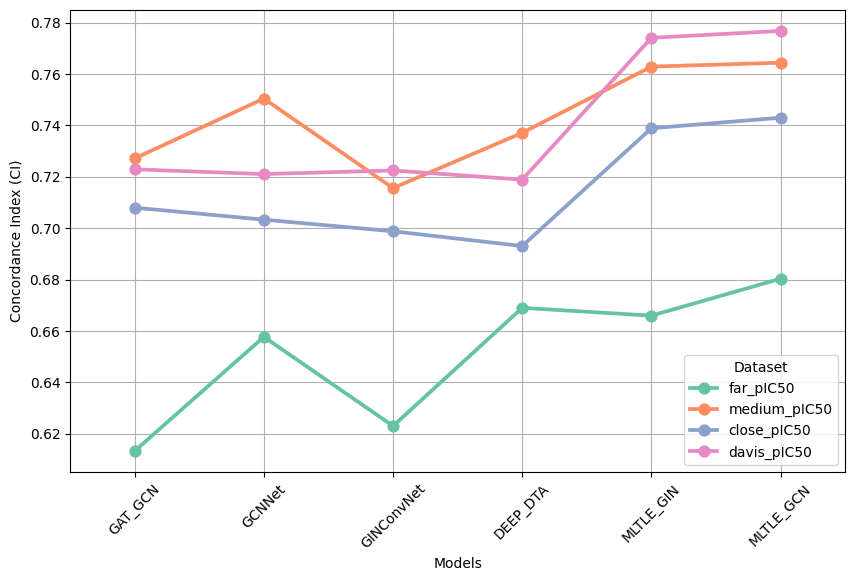

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the data
data = {
    'Models': ['GAT_GCN', 'GCNNet', 'GINConvNet', 'DEEP_DTA', 'MLTLE_GIN', 'MLTLE_GCN'],
    'far_pIC50': far_pIC50,
    'medium_pIC50': medium_pIC50,
    'close_pIC50': close_pIC50,
    'davis_pIC50': davis_pIC50,
}

# Create a dataframe
df = pd.DataFrame(data)

# Melt the dataframe to long format for seaborn plotting
df_melted = df.melt(id_vars='Models', var_name='Dataset', value_name='CI')

# Create a grouped point plot
plt.figure(figsize=(10, 6))
sns.pointplot(x='Models', y='CI', hue='Dataset', data=df_melted, palette='Set2')
plt.title('')
plt.xlabel('Models')
plt.ylabel('Concordance Index (CI)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Dataset')
plt.show()

In [ ]:
import pandas as pd

# Define the data
data = {
    'Models': ['GAT_GCN', 'GCNNet', 'GINConvNet', 'DEEP_DTA', 'MLTLE_GIN', 'MLTLE_GCN'],
    'far_pIC50': far_pIC50,
    'medium_pIC50': medium_pIC50,
    'close_pIC50': close_pIC50,
    'davis_pIC50': davis_pIC50,
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set the Models column as the index
df.set_index('Models', inplace=True)

# Display the DataFrame
print(df)

            far_pIC50  medium_pIC50  close_pIC50  davis_pIC50
Models                                                       
GAT_GCN      0.613308      0.727196     0.708001     0.722920
GCNNet       0.657691      0.750463     0.703328     0.721077
GINConvNet   0.623011      0.715629     0.698812     0.722493
DEEP_DTA     0.669000      0.737136     0.693063     0.718907
MLTLE_GIN    0.665965      0.762928     0.738930     0.774129
MLTLE_GCN    0.680339      0.764434     0.743023     0.776826


Average and compare

In [ ]:
# now I'd like to try to average pKd, pKi, pIC50 and compare

far_result_1 = concordance_index(far[pKd_list].mean(axis=1), far[pKi_list].mean(axis=1))
far_result_2 = concordance_index(far[pKd_list].mean(axis=1), far[pIC50_list].mean(axis=1))
far_result_3 = concordance_index(far[pIC50_list].mean(axis=1), far[pKi_list].mean(axis=1))


# close

close_result_1 = concordance_index(close[pKd_list].mean(axis=1), close[pKi_list].mean(axis=1))
close_result_2 = concordance_index(close[pKd_list].mean(axis=1), close[pIC50_list].mean(axis=1))
close_result_3 = concordance_index(close[pIC50_list].mean(axis=1), close[pKi_list].mean(axis=1))


# medium

medium_result_1 = concordance_index(medium[pKd_list].mean(axis=1), medium[pKi_list].mean(axis=1))
medium_result_2 = concordance_index(medium[pKd_list].mean(axis=1), medium[pIC50_list].mean(axis=1))
medium_result_3 = concordance_index(medium[pIC50_list].mean(axis=1), medium[pKi_list].mean(axis=1))


# davis

davis_result_1 = concordance_index(davis[pKd_list].mean(axis=1), davis[pKi_list].mean(axis=1))
davis_result_2 = concordance_index(davis[pKd_list].mean(axis=1), davis[pIC50_list].mean(axis=1))
davis_result_3 = concordance_index(davis[pIC50_list].mean(axis=1), davis[pKi_list].mean(axis=1))

In [ ]:
import pandas as pd

# Define the data
data = {
    'Comparison': ['Averaged pKd vs averaged pKi', 'Averaged pKd vs averaged pIC50', 'Averaged pIC50 vs averaged pKi'],
    'far': [far_result_1, far_result_2, far_result_3],
    'close': [close_result_1, close_result_2, close_result_3],
    'medium': [medium_result_1, medium_result_2, medium_result_3],
    'davis': [davis_result_1, davis_result_2, davis_result_3],
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Comparison', inplace=True)

# Display the DataFrame
print(df)

                                     far     close    medium     davis
Comparison                                                            
Averaged pKd vs averaged pKi    0.553844  0.535702  0.612547  0.506459
Averaged pKd vs averaged pIC50  0.595839  0.604076  0.663030  0.598429
Averaged pIC50 vs averaged pKi  0.625812  0.691451  0.726569  0.636501


In [ ]:
davis = pd.read_csv('/content/drive/MyDrive/ChemProj/DTA-models/Results_Davis/all_models_davis.csv')
davis

,Unnamed: 0,GAT_GCN_bdtdc_ki,GAT_GCN_bindingdb_kd,GAT_GCN_bdtdc_ic50,GCNNet_bdtdc_ki,GCNNet_bdtdc_kd,GCNNet_bdtdc_ic50,GINConvNet_bdtdc_ki,GINConvNet_bdtdc_kd,GINConvNet_bdtdc_ic50,DEEP_DTA_pIC50,DEEP_DTA_pKd,DEEP_DTA_pKi,MLTLE_GIN_pKd,MLTLE_GIN_pKi,MLTLE_GIN_pIC50,MLTLE_GCN_pKd,MLTLE_GCN_pKi,MLTLE_GCN_pIC50
0,0,5.525601,6.658693,6.052345,7.282896,5.122536,5.573604,5.701876,5.856341,7.388706,6.716503,5.009303,6.490987,4.882770,8.226421,6.763945,4.896073,6.157392,6.394428
1,1,6.514471,6.698398,7.761409,7.934494,5.276371,7.953074,5.479730,6.404390,6.287909,7.711575,5.285092,7.327796,5.581316,7.693880,7.784391,6.581346,6.518881,6.608533
2,2,5.453055,5.589183,7.063911,8.074280,4.978528,6.037891,5.758719,5.010209,5.649645,6.743186,5.010835,6.784390,4.982293,7.612237,6.275005,5.056749,6.101225,6.050715
3,3,7.130600,7.692660,7.299922,7.379193,6.830813,7.279695,5.747083,7.353450,6.975469,8.013111,7.496333,6.642398,5.484653,7.087056,7.901503,5.343631,7.553027,7.892383
4,4,5.977016,8.016321,6.419046,5.816498,6.652748,6.725718,5.467755,7.654112,6.301653,7.058646,7.659915,5.371161,7.366756,7.048313,7.414170,7.406726,8.622580,7.524013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,5795,5.782743,6.942259,5.188668,6.740661,7.636480,7.550047,5.837334,7.342681,5.947564,6.770930,5.027623,6.720116,8.460591,5.645679,5.063471,5.074298,6.573792,5.231730
5796,5796,6.075437,8.137795,7.247730,8.049115,8.497153,6.040845,6.894414,7.655736,5.528935,6.225325,6.509677,7.658330,7.835812,6.464956,6.258919,6.887872,6.091866,6.684772
5797,5797,5.248227,8.885300,7.294750,7.282601,7.036889,6.126243,6.845359,7.750977,5.860497,5.570751,5.003362,6.819632,7.799577,5.800175,6.806736,8.093538,6.030152,6.162783
5798,5798,5.760087,8.026533,7.062744,6.122861,7.598074,5.774836,6.528612,7.877510,4.981592,5.589571,4.995167,5.726870,8.502431,7.104663,6.390556,6.684752,6.115884,5.874699
